# EXP3

## Setup

Consider an unstructured bandit problem. Suppose that we have $k$ arms, each with random reward at time $t$ given by $rew[t] = avg[t] + \epsilon[t]$ where $\epsilon[t]$ is drawn from an i.i.d. standard Gaussian distribution.
The following code should be implemented to capture this setup.

# Reward function
Implement the reward function described in the setup. Specifically, given a $k$- dimensional vector 'avg', return $k$- dimensional vector 'rew' such that $rew[t] = avg[t] + \epsilon[t]$ where $\epsilon[t] \sim \mathcal{N}(0,0.01 \times I)$ where $I$ is the identity matrix of size $k \times k$.

In [ ]:
def get_reward(avg, var):
    
    ## Your Code here
    rew = avg + np.random.normal(loc = 0, scale = 0.01, size = avg.size)
    
    return rew

## Algorithm review


Recall there are three parameters of interest in the EXP3 algoritm: $(n, k, \eta),$ where $n$ is the time horizon, $k$ is the number of arms, and $\eta$ is a learning rate. Please refer to the text book (Algorithm 9 page 152) for details.


## Goal of this exercise

Implement the following using the template provided below. Please use the variable names suggested in the comments.

1. Basic EXP3 algorithm implementation
2. Plot the expected cumulative regret of the EXP3 algorithm vs. horizon ($n$).
3. The cumulative regret is expected to be logarithmic against the horizon. To check that this is case, plot the logarithm of the expected cumulative regret of the EXP3 algorithm vs. horizon ($n$). (Hint: use the semilogx function in matplotlib.pyplot) 

# Import Dependencies

In [ ]:
import numpy as np
import pickle

## EXP3

In [ ]:
class EXP3(object):
    def __init__(self, avg, eta): ## Initialization
        
        self.means = avg
        self.num_arms = avg.size
        self.eta = eta
        self.best_arm = np.argmax(self.means)
        self.restart()

        return None

        ## variable names (most are self explanatory)
        ## self.num_arms is the number of arms (k)
        ## self.means[arm] is the vector of true means of the arms
        ## self.time is the current time index
        ## self.best_arm is the best arm given the true mean rewards
        ## self.cum_reg is the cumulative regret
        ## self.num_plays[arm] is the vector of number of times that arm k has been pulled
        ## self.eta is the learning rate
        ## self.probs_arr is the sampling distribution vector P_t
        ## self.S is the vector of estimated reward by the end of time t
    
    def restart(self): ## Restart the algorithm: Reset self.time to zero (done)
                       ## Set the values of the num_plays, S, and cum_reg to zero, 
                       ## and set probs_arr to be uniform
        self.time = 0.0
        self.num_plays = np.zeros(self.num_arms)
        self.S = np.zeros(self.num_arms)
        self.cum_regret = [0]
        self.probs_arr = [1/self.num_arms] * self.num_arms # Multiple Uniform
        ## Your Code here

        return None
    
    def get_best_arm(self): ## For each time index, find the best arm according to EXP3
                            ## Hint: use np.random.choice
        ## Your code here
        return np.random.choice(self.num_arms, 1, p=self.probs_arr)
    
    def update_exp3(self, arm, rew_vec): ## Compute probs_arr and update the total estimated reward for each arm
        
        ## Your Code here

        self.probs_arr = (np.exp(self.eta*self.S))/np.sum(np.exp(self.eta*self.S))

        #for i in range(self.num_arms):
        #  if i == arm:
        #    self.S[arm] = self.S[arm] + 1 - ((1-rew_vec[arm]) / self.probs_arr[arm])
        #  else:
        #    self.S[i] = self.S[i] + 1
        self.S += 1
        self.S[arm] -= ((1-rew_vec[arm])/self.probs_arr[arm])
        
        return None
    
    def update_reg(self, arm, rew_vec): ## Update the cumulative regret vector
       
       ## Your Code here
       self.cum_regret.append(self.cum_regret[-1] + (rew_vec[self.best_arm] - rew_vec[arm]))

       return None
    
    def iterate(self, rew_vec): ## Iterate the algorithm
        self.time += 1.0
        
        ## Your Code here
        arm = self.get_best_arm()

        self.update_exp3(arm, rew_vec)
        self.update_reg(arm,rew_vec)
        
        return None

# Experiment Function

The following code runs the EXP3 algorithm for multiple instances. In the code below, num_inst is the number of instances, and num_iter is the time at which we stop.

In [ ]:
def run_algo(avg, eta, num_iter, num_inst, var):
    
    reg = np.zeros((num_inst, num_iter))
    
    algo = EXP3(avg, eta)
    
    
    for k in range(num_inst):
        algo.restart()
        
        if (k+1)%10 == 0:
            print('Instance number = ', k+1)
        
        for t in range(num_iter-1):
            rew_vec = get_reward(avg,var)
            
            algo.iterate(rew_vec)
            
        reg[k,:] = np.asarray(algo.cum_regret)
        
    return reg

# Initializations
Use the following to initialize your algorithm. The value of $k$ is implicitly set to $3$ in the initialization below. (This vector contains the actual mean rewards).

In [ ]:
avg = np.asarray([0.8,0.7,0.5])
num_iter,num_inst = int(2e3),20
eta = np.sqrt(np.log(avg.size) / (num_iter * avg.size))
var = 0.01

# Run Experiment

In [ ]:
reg = run_algo(avg, eta, num_iter, num_inst, var)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


Instance number =  10
Instance number =  20


## Plotting the Results

1 - Compute the average regret over the number of instances and plot it against the number of iterations. Label the x-axis as time, and the y-axis as Cumulative Regret. Add a caption labeling this as 'Cumulative Regret with EXP3'.

2 - Use the semilogx function in matplotlib to check that the regret is logarithmic against horizon.

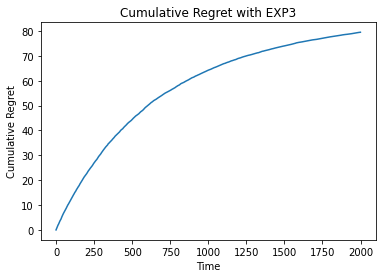

In [ ]:
## Your Code here
import matplotlib.pyplot as plt

reg_lst = [reg_sublst[-1] for reg_sublst in reg]
avgreg_lst = np.mean(reg, 0)

plt.plot(avgreg_lst)
plt.xlabel('Time')
plt.ylabel('Cumulative Regret')
plt.title('Cumulative Regret with EXP3')
plt.show()


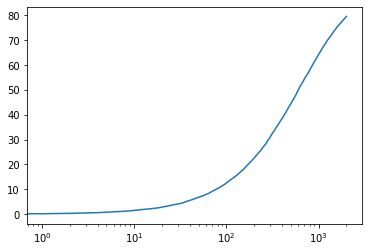

In [ ]:
plt.semilogx(avgreg_lst)
plt.show()